<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# df로 불러옵니다
df = pd.read_csv('/content/drive/MyDrive/data.csv')

#label 변수 생성
label = df['diagnosis']

#feature만을 갖고 있는 새로운 데이터 프레임 생성
df_features = df.loc[:,'radius_mean':'fractal_dimension_worst']

#clustering할 때 특정 feature에 더 많은 영향을 끼치는 것을 방지하고자 모든 feature의 값의 범위를 동일하게 만든 후 해당 feature를 가진 dataframe을 생성
df_features_s = pd.DataFrame(scaler.fit_transform(df_features))
df_features_s.columns = df_features.columns

# #k-means clustering 
model = KMeans(n_clusters = 2,random_state = 42)
model.fit(df_features_s)
predict = pd.DataFrame(model.predict(df_features_s))
predict.columns = ['cluster 이후 label']
predict

,cluster 이후 label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [2]:
predict = predict.replace(0,'M')
predict = predict.replace(1,'B')

count = 0
for i,j in zip(label,predict['cluster 이후 label']):
  if i == j :
    count+=1
Acc = count / len(label)
Acc

0.9050966608084359

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


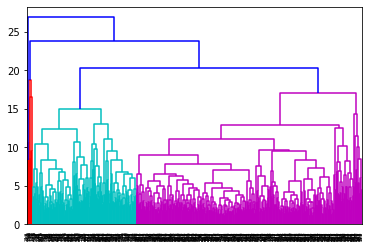

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_features_s

clustering = linkage(df_features_s,'complete')
dn = dendrogram(clustering)

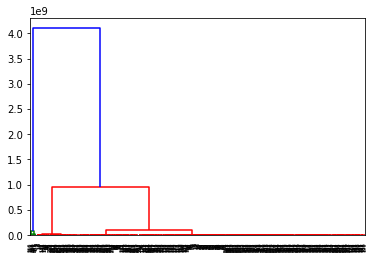

In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(df_features_s)
df['cluster'] = clustering.labels_
a  = df.loc[:,['id','cluster']]

clustering = linkage(a,'ward')
dn = dendrogram(clustering)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')